# Model Training & Prediction  Analysis

Model training in machine language is the process of feeding an ML algorithm with data to help identify and learn good values for all attributes involved. There are several types of machine learning models, of which the most common ones are supervised and unsupervised learning. According to the nature of our problem and the dataset the learning algorithm will be Supervised machine learning. 

Five (5) classification algorithm will be use

1. RandomForest Classifier

2. Support Vector Machine

3. Naive Bayes

4. XBoost

5. DecisionTree Classifier

We will train all the five algorithms and compare the accuracy of prediction among them and then select the best algorithms with high accuracy prediction as our final algorithms for mobile price range prediction.
 


In [99]:
%load_ext autoreload
#hide warnings
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('precision', 3)


In [3]:
# extra imports
from pandas import read_csv
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode


#library for visualization
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from matplotlib.pyplot import figure

#models 
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,  KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier , GradientBoostingClassifier , RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier


##### Reading the file

Here we are reading the .csv of the preprocessed file, we use the file which is already clean and therefore we will not do any data preprocessing work.

In [4]:
mobile = read_csv("Data/clean_train.csv", header=0, delimiter=',')
mobile.shape

(1600, 21)

In [5]:
mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,959,1,2.6,1,15.0,0,20,1.0,84,4,...,561.0,1631,3965,16,1.0,6,1,0,0,3
1,1724,0,2.0,1,2.0,1,57,0.5,177,3,...,1605.0,1924,2822,19,3.0,16,1,1,0,3
2,1456,1,0.5,1,7.0,0,7,0.4,105,5,...,823.0,1104,1587,6,5.0,20,1,0,1,1
3,1993,1,0.5,0,10.0,1,27,0.3,147,8,...,150.0,510,2437,14,1.0,9,1,0,0,2
4,864,0,1.6,1,2.0,1,53,0.3,88,6,...,262.0,1436,493,18,9.0,10,1,1,0,0


In [6]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1600.000,1600.000,1600.000,1600.000,1600.000,1600.000,1600.000,1600.000,1600.000,1600.000,...,1600.000,1600.000,1600.000,1600.000,1600.000,1600.000,1600.000,1600.0,1600.000,1600.000
mean,1244.831,0.508,1.520,0.509,5.476,0.516,32.142,0.499,140.364,4.522,...,644.715,1249.115,2117.431,12.299,6.326,10.948,0.762,0.5,0.497,1.500
std,433.193,0.500,0.815,0.500,3.950,0.500,18.114,0.288,35.495,2.286,...,441.211,431.139,1081.240,4.224,4.181,5.461,0.426,0.5,0.500,1.118
min,502.000,0.000,0.500,0.000,1.000,0.000,2.000,0.100,80.000,1.000,...,1.000,500.000,258.000,5.000,1.000,2.000,0.000,0.0,0.000,0.000
25%,864.750,0.000,0.700,0.000,2.000,0.000,16.000,0.200,109.000,3.000,...,285.500,874.000,1209.750,9.000,3.000,6.000,1.000,0.0,0.000,0.750
50%,1235.000,1.000,1.500,1.000,5.000,1.000,32.000,0.500,141.000,4.000,...,567.750,1247.000,2125.500,12.000,5.000,11.000,1.000,0.5,0.000,1.500
75%,1616.250,1.000,2.200,1.000,8.000,1.000,48.000,0.800,170.000,7.000,...,945.000,1629.500,3040.500,16.000,9.000,16.000,1.000,1.0,1.000,2.250
max,1998.000,1.000,3.000,1.000,17.000,1.000,64.000,1.000,200.000,8.000,...,1920.000,1998.000,3998.000,19.000,18.000,20.000,1.000,1.0,1.000,3.000


## Section 1: Model Selection
Model selection is a process of comparing the relative value of different statistical models and determine which one is the best fit for the observed data. The models that will be compared are:

  1. RandomForest Classifier
  2. Support Vector Machine
  3. Naive Bayes
  4. XBoost
  5. DecisionTree Classifier

We will fit all the five algorithms and compare the accuracy of prediction among them and then select the best algorithms with high accuracy prediction as our final algorithms for mobile price range prediction.

In [7]:
#import library
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

### 1.1 Hyperparameter Tuning using GridSearchCV  & k-Fold Cross Validation
Hyperparameter optimization refers to performing a search in order to discover the set of specific model configuration arguments that result in the best performance of the model on a specific dataset. These hyperparameters may be used to address model design questions such as; the maximum depth allowed decision treebe ,maximum features used to the model, how many number of trees should included in random forest and many other important configaration such as value of parameter c in SVC. 
In this section we will find the best parameters for all the five algorithms we want to compare using GridSearchCV method.

### Data pipeline

In [84]:
from sklearn.model_selection import train_test_split
#Data set without target variable
X = mobile.loc[:,mobile.columns != 'price_range']

#target variable
y = mobile['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [85]:
X_train.shape

(1072, 20)

In [9]:
#dictionary to store the score of each algorthms the algorithsm
model_accuracy = {}

#### Function to get best estimator

In [10]:
#define a method to get best estimater and it scores
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
f1 = make_scorer(f1_score, average='micro')
cv = KFold(n_splits=5, random_state=None, shuffle=False)
def get_best(classifier,grid_param):
    gre= GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring=f1,
                     cv=cv,
                     n_jobs=-1)

    gre.fit(X, y)
    
    return gre.best_estimator_,gre.best_score_

### Random Forest Classifier

A random forest is a supervised machine learning method built from decision tree techniques. It is used to solve both regression and classification problem. This technique use ensemble learning which combine multiple classifiers to solve complicated problems
A random forest is a machine learning approach for solving regression and classification issues. It makes use of ensemble learning, which is a technique that combines multiple classifiers to solve complicated problems.

A random forest method is made up of a large number of decision trees. The random forest algorithm’s ‘forest’ is trained via bagging or bootstrap aggregation. Bagging is a meta-algorithm ensemble that increases the accuracy of machine learning algorithms.

In [11]:
from sklearn.ensemble import RandomForestClassifier 

classifier = RandomForestClassifier()
grid_param = {'criterion':['gini','entropy'],
         'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7],
          'max_features': [7,10,15,20],
          }

In [12]:
best_estimator,best_score = get_best(classifier,grid_param)
model_accuracy['RandomForest']=best_score

In [13]:
print("The best estimator: ", best_estimator)
print("The best score is {:.2f}.".format(best_score))

The best estimator:  RandomForestClassifier(criterion='entropy', max_features=15, min_samples_leaf=3,
                       min_samples_split=6, n_estimators=30)
The best score is 0.91.


### Support Vector Machine
Support-vector machines (SVMs) is the supervised learning models with associated learning algorithms that analyze data for classification, regression analysis and outlier detection.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.


In [14]:
from sklearn.model_selection import train_test_split,  KFold, cross_val_score, GridSearchCV
from sklearn.svm import SVC
classifier = SVC()
grid_param = {'C': [1,5,10,50,100],
              'gamma': [.1,.5,.25,1],
             'kernel':['rbf','poly','sigmoid','linear']}

In [15]:
best_estimator,best_score = get_best(classifier,grid_param)
model_accuracy['SVM']=best_score

In [18]:
print("The best estimator: ", best_estimator)
print("The best score is {:.2f}.".format(best_score))

The best estimator:  SVC(C=1, gamma=0.1, kernel='linear')
The best score is 0.97.


### Naive Bayes Classifier
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem. This algorithms work well in the data with gaussian distribution, we assume that the dataset we have is normal distributed.


In [57]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
grid_param = {'var_smoothing': np.logspace(0,-5, num=5)}

In [58]:
best_estimator,best_score = get_best(classifier,grid_param)
model_accuracy['Naive Bayes']= best_score

In [59]:
print("The best estimator: ", best_estimator)
print("The best score is {:.2f}.".format(best_score))

The best estimator:  GaussianNB(var_smoothing=1e-05)
The best score is 0.80.


### XGBOOST

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [29]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
grid_param = {
    'learning_rate':[0.01],
    'n_estimators':[5000],
    'max_depth':[4],
    'min_child_weight':[6],
    'gamma':[0],
    'subsample':[0.8],
    'colsample_bytree':[0.8],
    'reg_alpha':[0.005],
    'objective':['binary:logistic'],
}

In [30]:
best_estimator,best_score = get_best(classifier,grid_param)
model_accuracy['XGBOOST']= best_score

C:\Users\ashas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[16:25:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [31]:
print("The best estimator: ", best_estimator)
print("The best score is {:.2f}.".format(best_score))

The best estimator:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0.005, reg_lambda=1, scale_pos_weight=None,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)
The best score is 0.91.


### Decision Tree Classifier
Decision Tree Classifier is a supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
grid_param ={
    'max_features':['auto','sqrt','log2'],
    'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
    'random_state':[123],
}

In [26]:
best_estimator,best_score = get_best(classifier,grid_param)
model_accuracy['Decision Tree']= best_score

In [27]:
print("The best estimator: ", best_estimator)
print("The best score is {:.2f}.".format(best_score))

The best estimator:  DecisionTreeClassifier(max_features='auto', min_samples_leaf=3,
                       min_samples_split=12, random_state=123)
The best score is 0.70.


#### Best Score Prediction Of Algorithsm

In [34]:
model_accuracy

{'RandomForest': 0.9068750000000001,
 'SVM': 0.9706250000000001,
 'Naive Bayes': 0.8018750000000001,
 'XGBOOST': 0.906875,
 'Decision Tree': 0.703125}

Text(0.5, 1.0, 'The Model Perfomance Result Score')

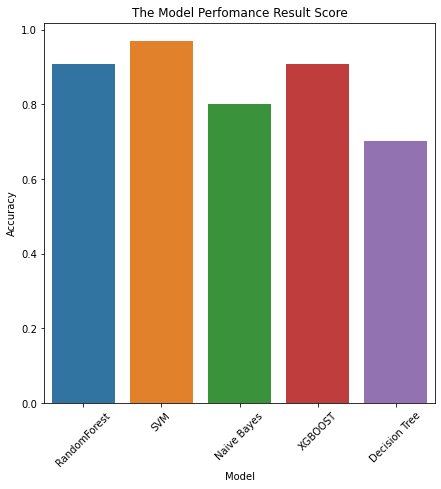

In [35]:
fig, ax = plt.subplots(figsize=(7,7))
models= pd.DataFrame.from_dict(model_accuracy, orient="index").reset_index()
plt.title('The Model Perfomance Result Score')
models.columns = ['Model','Accuracy']
ax = sn.barplot(x="Model", y="Accuracy", data=models, ax=ax)
ax.tick_params(axis='x', rotation=45)
fig.savefig('Figures/final_model_validator.jpeg')

### 1.2:  Select a winner
After doing model validation of different algorithsm now we compare the best scores of all the algorithsm and choose the one with the highest score

The figure above show that the highest accuracy model is obtained by Support Vector Machine with the the highest accuracy performance prediction score of approximately 0.97 equivalent to 97% followed by RandomForest with an accuracy of 91%, XGBoost with 91%, Gaussian Naive Bayes with 80% and the last one is Decision Tree with 70% accuracy.

Therefore we select Support Vector Machine (SVC) as our final model for prediction the price range of the mobile with paramters configuration of (kernel='linear',gamma=0.1,C=1)


### Section 2: Build a Final Model & Validation Analysis

In [190]:
SVM = SVC(kernel='linear',gamma=0.1,C=1)

##### Training the Model with All the Features uncomment  the below code

In [191]:
#fit model to final training set with
#SVM.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear')

##### Training the model with 10 best features 

In [206]:
fs = SelectKBest(score_func=chi2, k=10)
# apply feature selection
X_selected = fs.fit_transform(X_train, y_train)
print(X_selected.shape)


(1072, 10)


In [207]:
#fit the model with 10 best features
SVM.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='linear')

In [208]:
#predict the price
y_pred  = SVM.predict(X_test)

#### 2.1 Estimate Predictive Error

In [209]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print('Mean_Squared_Error :{:.2f}'.format(mse))
print('r_square_value :{:.2f}'.format(r_squared))

Mean_Squared_Error :0.04
r_square_value :0.97


#### 2.2  Classification Report

In [210]:
print('Prediction Accuracy Score {:.2f}.'.format(accuracy_score(y_test,y_pred)))
clax_report = classification_report(y_test,y_pred,output_dict=True)
report_df = pd.DataFrame(clax_report).transpose()
report_df


Prediction Accuracy Score 0.96.


,precision,recall,f1-score,support
0,0.977,0.969,0.973,129.000
1,0.926,0.969,0.947,130.000
2,0.977,0.912,0.943,137.000
3,0.956,0.985,0.970,132.000
accuracy,0.958,0.958,0.958,0.958
macro avg,0.959,0.959,0.958,528.000
weighted avg,0.959,0.958,0.958,528.000


#### 2.3 Confusion Matrix

<AxesSubplot:>

Text(0.5, 42.0, 'Predicted Values')

Text(42.0, 0.5, 'Actual Values')

Text(0.5, 1.0, 'Accuracy Prediction Score During Training 0.96 ')

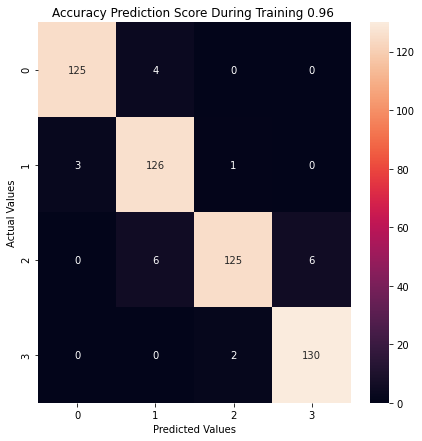

In [211]:
cm = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(7,7))
sn.heatmap(cm, annot=True, fmt='d', ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Prediction Score During Training {:.2f} '.format(accuracy_score(y_test,y_pred)))
plt.show()
f.savefig('Figures/confusion_svc.jpeg')

### Section 3: Prediction Analysis
Now we will use our final model to predict the price range using test data (unseen data) and evaluate it performance

#### 3.1 Data Pipeline

In [223]:
#load the testing data
data = read_csv("Data/clean_test.csv", header=0, delimiter=',')
data.shape

(400, 21)

In [224]:
#separet the data featured and target variables
X_test2 = data.loc[:,data.columns != 'price_range']
y_act = data ['price_range']

In [225]:
X_test2.shape

(400, 20)

#### 3.2 Predict the mobile price range
Here we will use the intitial trained SVC model which is trained with 20 features to predict the final price range of the phone.

In [226]:
#predicted price range
y_pred  = SVM.predict(X_test2)

In [227]:
y_pred

array([2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 3, 2, 3, 3, 1, 3, 2, 2, 0, 2, 3, 3,
       0, 0, 3, 0, 0, 2, 1, 2, 0, 1, 1, 3, 3, 3, 3, 0, 1, 1, 3, 0, 3, 1,
       0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 3, 0, 0, 3, 1, 2, 0, 2, 2, 1, 2, 0,
       1, 1, 0, 3, 1, 0, 3, 2, 0, 0, 3, 2, 0, 2, 2, 0, 0, 2, 2, 3, 0, 1,
       2, 1, 2, 3, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 0, 0, 3, 2, 3,
       3, 3, 0, 2, 1, 1, 3, 0, 0, 1, 3, 0, 0, 3, 0, 2, 3, 3, 0, 3, 3, 1,
       3, 1, 3, 1, 1, 3, 1, 2, 1, 2, 2, 2, 0, 0, 1, 3, 0, 3, 1, 3, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 0, 2, 1, 3, 2, 2, 1, 0, 1, 3, 0, 1, 1, 1,
       2, 1, 1, 0, 3, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 3, 1, 3,
       3, 2, 0, 2, 1, 3, 1, 3, 3, 1, 1, 1, 3, 0, 0, 3, 3, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 1, 1, 2, 3, 1, 3, 1, 0, 1, 3, 0, 3, 3, 2, 2, 3, 1, 1,
       1, 2, 3, 1, 0, 1, 3, 1, 0, 2, 0, 1, 3, 0, 0, 2, 1, 1, 1, 1, 1, 3,
       2, 2, 1, 0, 1, 3, 0, 2, 3, 0, 2, 1, 2, 3, 3, 2, 0, 0, 1, 1, 3, 0,
       1, 1, 1, 0, 2, 0, 1, 2, 2, 3, 3, 1, 1, 3, 3,

#### 3.3 Performing  Error Prediction Check
In this section we will look how our model have predicted well for unseen, therefore we will check the results of prediction columns and the one with the original price and fiter out those with incorrectly label

In [228]:
print('Prediction Accuracy Score {:.2f}.'.format(accuracy_score(y_act,y_pred)))
clax_report = classification_report(y_act,y_pred,output_dict=True)
report_df = pd.DataFrame(clax_report).transpose()
report_df

Prediction Accuracy Score 0.98.


,precision,recall,f1-score,support
0,0.980,1.000,0.990,100.000
1,0.980,0.970,0.975,100.000
2,0.990,0.960,0.975,100.000
3,0.980,1.000,0.990,100.000
accuracy,0.983,0.983,0.983,0.983
macro avg,0.983,0.982,0.982,400.000
weighted avg,0.983,0.983,0.982,400.000


<AxesSubplot:>

Text(0.5, 42.0, 'Predicted Values')

Text(42.0, 0.5, 'Actual Values')

Text(0.5, 1.0, 'Accuracy Prediction Score of the Final Test 0.98 ')

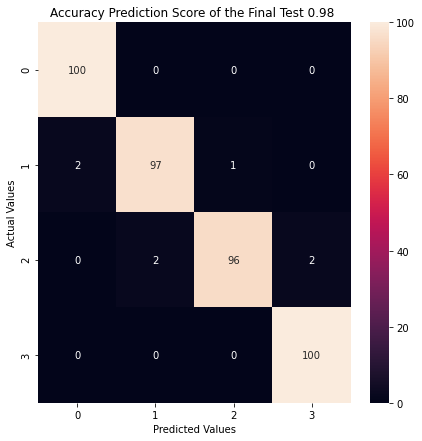

In [229]:
cm = confusion_matrix(y_act,y_pred)
f, ax = plt.subplots(figsize=(7,7))
sn.heatmap(cm, annot=True, fmt='d', ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Prediction Score of the Final Test {:.2f} '.format(accuracy_score(y_act,y_pred)))
plt.show()
f.savefig('Figures/svc_final_test.jpeg')

#### Results
The results show that our model predict the price range of the phome with the accuracy of 98%
The total number of observations tested are 400 with equally distribution of 100 samples per each class.

The model predict well in class 0 (low cost price) and class 3 (very highest cost) in which all sample were correctly classified, the model did not predict well in class 1(medium cost) and class 2(hight cost), this is actually because most of the features in this two classes are related. In class (1 ) 94 observation were predicted correctly while 2 observations were predicted in class (0) and the remaining 4 predicted in class 2. And in the class (2) 97 obseravtions were predicted correctly, 2 observations predicted in class (1) and the remaining 1 is predicted in class (3)

In general we can conclude that the prediction performance of our model is quite good. 

In [230]:
data['predicted_price_range']=y_pred

#### List of samples that are incorrectly classified!

In [231]:
data[data['price_range']!=data['predicted_price_range']]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,predicted_price_range
26,1731,1,2.3,1,5.0,0,60,0.5,171,4,...,1039,1220,9,3.0,20,0,1,0,1,0
147,1583,0,1.2,1,2.0,0,14,0.2,148,2,...,1673,2498,13,6.0,8,0,0,1,2,3
185,1476,1,1.2,1,5.0,1,55,0.1,171,4,...,1666,1529,13,8.0,3,1,0,1,2,1
300,633,1,2.2,0,9.0,1,49,0.1,139,8,...,1009,3560,11,1.0,16,1,1,1,2,3
379,1744,1,1.0,0,1.0,1,20,0.5,112,8,...,718,1205,18,7.0,14,1,0,0,1,0
394,1885,0,2.4,1,12.0,1,14,0.6,92,4,...,1517,1277,9,6.0,16,1,0,1,1,2
397,645,0,0.5,0,1.0,0,41,1.0,197,7,...,580,2962,12,9.0,4,1,1,1,2,1


##### Save file

In [232]:
#save the results
data.to_csv('Data/predicted_price_range.csv',index=False)

### Conclusion

Supper Vector Machine is the final chosen algorithm among all the other classification models, SVM got the highest accuracy performance prediction score of approximately 0.97 equivalent to 97% followed by RandomForest with an accuracy of 91%, XGBoost with 90%, Gaussian Naive Bayes with 81% and the last one is Decision Tree with 70% accuracy.

The configuration paramters of (kernel='linear',gamma=0.1,C=1)
Mean_Squared_Error : 0.03977272727272727
